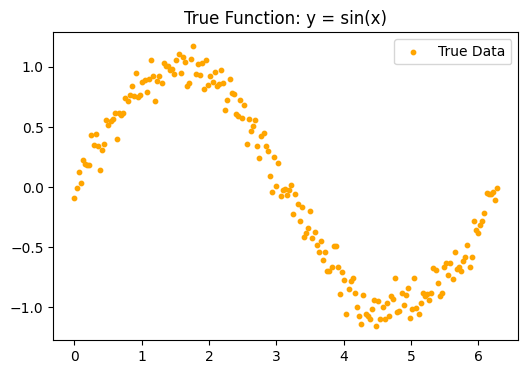

NonLinearModel(
  (layer1): Linear(in_features=1, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch 0, Loss: 1.10849
Epoch 200, Loss: 0.02037
Epoch 400, Loss: 0.00940
Epoch 600, Loss: 0.00969
Epoch 800, Loss: 0.00896
Epoch 1000, Loss: 0.00886
Epoch 1200, Loss: 0.00883
Epoch 1400, Loss: 0.00913
Epoch 1600, Loss: 0.00882
Epoch 1800, Loss: 0.00871


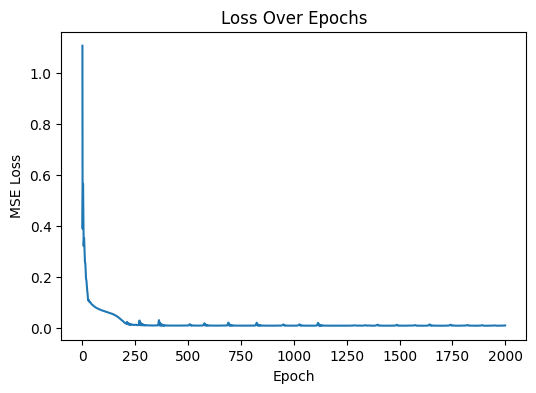

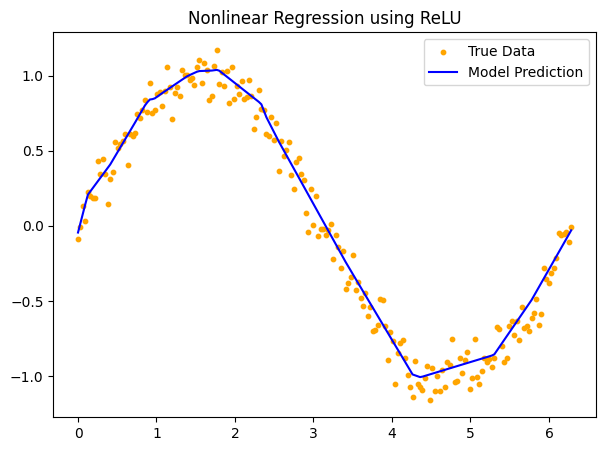

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np


# Generate input values between 0 and 2π
X = torch.linspace(0, 2 * np.pi, 200).reshape(-1, 1)

# True nonlinear function: y = sin(x)
y = torch.sin(X) + 0.1 * torch.randn(X.shape)  # small noise for realism

# Plot the real data
plt.figure(figsize=(6, 4))
plt.scatter(X, y, s=10, label="True Data", color='orange')
plt.title("True Function: y = sin(x)")
plt.legend()
plt.show()

class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define network layers
        self.layer1 = nn.Linear(1, 32)   # 1 input feature → 32 neurons
        self.layer2 = nn.Linear(32, 32)  # 32 → 32 neurons
        self.output = nn.Linear(32, 1)   # 32 → 1 output (predicted y)
        
        # Define activation (ReLU)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Pass input through layers and activations
        x = self.relu(self.layer1(x))    # Input → hidden layer 1
        x = self.relu(self.layer2(x))    # Hidden layer 2        
        x = self.output(x)               # Output layer (no activation)
        return x

# Create model instance
model = NonLinearModel()
print(model)

criterion = nn.MSELoss()                 # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer


epochs = 2000
losses = []

for epoch in range(epochs):
    # ---- Forward Pass ----
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # ---- Backward Pass ----
    optimizer.zero_grad()  # clear old gradients
    loss.backward()        # compute new gradients via autograd
    optimizer.step()       # update weights
    
    # ---- Record progress ----
    losses.append(loss.item())
    
    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.5f}")


plt.figure(figsize=(6,4))
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


# Detach predicted values from computation graph
with torch.no_grad():
    preds = model(X)

plt.figure(figsize=(7,5))
plt.scatter(X, y, label="True Data", color='orange', s=10)
plt.plot(X, preds, label="Model Prediction", color='blue')
plt.legend()
plt.title("Nonlinear Regression using ReLU")
plt.show()
